In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
import sys
sys.path.append('..')
from madule import plots
from scipy import stats
from statsmodels.stats.anova import AnovaRM

In [110]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')

### Proportion across tials, win plus amount

- Win stay and large amount
- win stay and lower amount
- loss shift and larger amount
- loss shift and lower amount

In [130]:
# Find chosen win amount for each trial
chosenAmount = behAll['leftChosen']*behAll['winAmtLeft'] + (1-behAll['leftChosen'])*behAll['winAmtRight'] 
behAll['chosenWinAmt'] = chosenAmount

In [212]:
# Create empty dataframe to save proportion win stay and lose shift for each record
df_win_loss = pd.DataFrame()

# List of subjects
subList = np.unique(behAll.sub_ID)
for sub in subList:
    for session in range(2):
        for run in range(2):
            for block in ['Act', 'Stim']:
                
                # Take color or action value learning, one  
                behAllCond = behAll.loc[(behAll['session']==session+1)&(behAll['run']==run+1)&(behAll['block']==block)&(behAll['sub_ID']==sub)]
                # get reverse
                reverse = np.unique(behAllCond.reverse)[0]
                # get group label
                group = np.unique(behAllCond.group)[0]
                
                # number of winning reward for action value learning
                n_win = np.sum((behAllCond['correctChoice']==1)& (behAllCond['chosenWinAmt']<50))
                win_stay = np.zeros(n_win)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1 and behAllCond['chosenWinAmt'].to_numpy()[i]<50:
                            win_stay[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==1 and behAllCond['chosenWinAmt'].to_numpy()[i]<50:
                            win_stay[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1

                # number of punishment for action value learning
                n_loss = np.sum((behAllCond['correctChoice']==0) & (behAllCond['chosenWinAmt']<50))
                loss_stay = np.zeros(n_loss)
                if block=='Act':
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0 and behAllCond['chosenWinAmt'].to_numpy()[i]<50:
                            loss_stay[j] = behAllCond['pushed'].to_numpy()[i]==behAllCond['pushed'].to_numpy()[i+1]
                            j+=1
                else:
                    j = 0
                    for i in range(len(behAllCond)-1):
                        if behAllCond['correctChoice'].to_numpy()[i]==0 and behAllCond['chosenWinAmt'].to_numpy()[i]<50:
                            loss_stay[j] = behAllCond['yellowChosen'].to_numpy()[i]==behAllCond['yellowChosen'].to_numpy()[i+1]
                            j+=1
                
                # dictionary for each record
                dic = {'session':session+1, 'run':run+1, 'block':block, 'sub_ID':sub, 'reverse':reverse, 'group':group, 
                      'win_stay': win_stay.mean(),  'loss_stay':loss_stay.mean()}
                # Put the dictionary into dataframe
                df_win_loss = pd.concat([pd.DataFrame([dic]), df_win_loss])
                
            
                

/tmp/ipykernel_3994635/3409424162.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(),  'loss_stay':loss_stay.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3994635/3409424162.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(),  'loss_stay':loss_stay.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3994635/3409424162.py:52: RuntimeWarning: Mean of empty slice.
  'win_stay': win_stay.mean(),  'loss_stay':loss_stay.mean()}
/mrhome/amingk/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3994635/3409424162.py:52: Ru

In [208]:
df_win_loss.groupby(['group'], as_index=False)['win_stay'].mean()

,group,win_stay
0,1,0.705175
1,2,0.752803
2,3,0.715222


In [210]:
df_win_loss.groupby(['group'], as_index=False)['loss_stay'].mean()

,group,loss_stay
0,1,0.530720
1,2,0.536093
2,3,0.482898


In [213]:
df_win_loss.groupby(['group'], as_index=False)['win_stay'].mean()

,group,win_stay
0,1,0.755191
1,2,0.795031
2,3,0.808614


In [214]:
df_win_loss.groupby(['group'], as_index=False)['loss_stay'].mean()

,group,loss_stay
0,1,0.531708
1,2,0.579105
2,3,0.517873


Text(0, 0.5, 'P(stay|non-reward)')

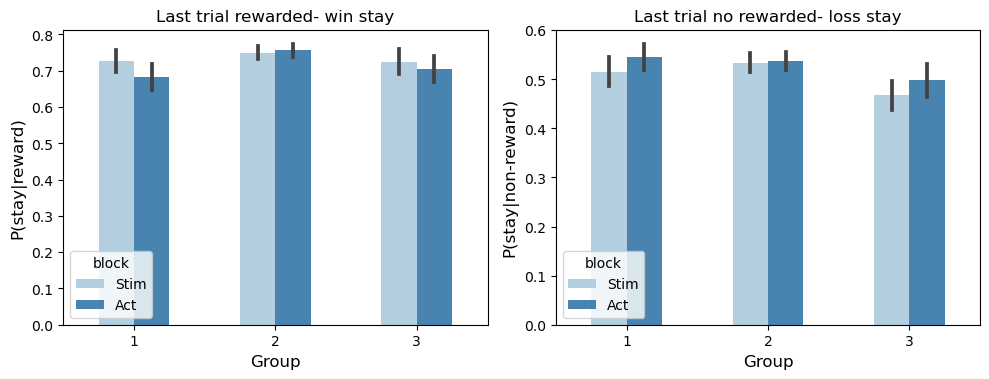

In [198]:
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# Win stay
fig.add_subplot(row, column, 1)
sns.barplot(data = df_win_loss, x='group', y='win_stay', hue='block',  width=.5, errorbar="se", palette = 'Blues')
plt.title('Last trial rewarded- win stay', fontsize='12')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(stay|reward)', fontsize='12')

# Loss stay
fig.add_subplot(row, column, 2)
sns.barplot(data = df_win_loss, x='group', y='loss_stay', hue='block',  width=.5, errorbar="se", palette = 'Blues')
plt.title('Last trial no rewarded- loss stay', fontsize='12')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(stay|non-reward)', fontsize='12')


Text(0, 0.5, 'P(stay|non-reward)')

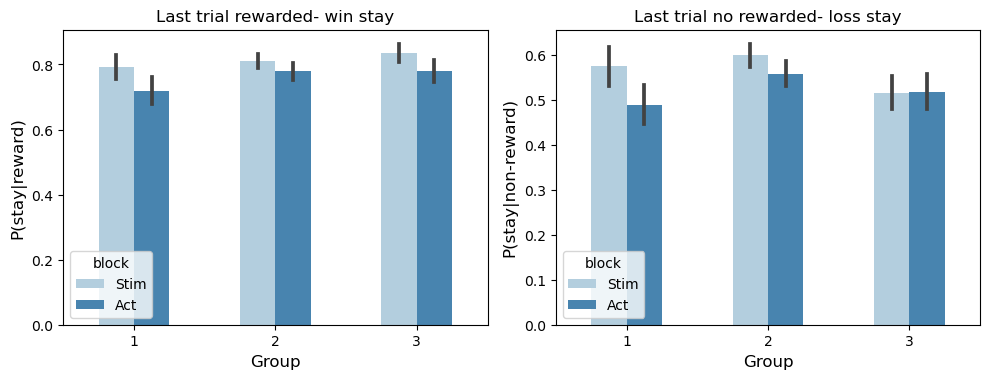

In [193]:
fig = plt.figure(figsize=(10,7), tight_layout=True)
row = 2
column = 2

# Win stay
fig.add_subplot(row, column, 1)
sns.barplot(data = df_win_loss, x='group', y='win_stay', hue='block',  width=.5, errorbar="se", palette = 'Blues')
plt.title('Last trial rewarded- win stay', fontsize='12')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(stay|reward)', fontsize='12')

# Loss stay
fig.add_subplot(row, column, 2)
sns.barplot(data = df_win_loss, x='group', y='loss_stay', hue='block',  width=.5, errorbar="se", palette = 'Blues')
plt.title('Last trial no rewarded- loss stay', fontsize='12')
plt.xlabel('Group', fontsize='12')
plt.ylabel('P(stay|non-reward)', fontsize='12')


In [145]:
anov = AnovaRM(data = df_win_loss[df_win_loss['group']!=2], depvar='win_stay', subject='sub_ID', within=['group', 'block'], between=None, aggregate_func='mean')
print(anov.fit())

                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
group        0.0219 1.0000 21.0000 0.8838
block        3.7797 1.0000 21.0000 0.0654
group:block  0.5049 1.0000 21.0000 0.4852



In [11]:
anov = AnovaRM(data = df_win_loss[df_win_loss['group']!=2], depvar='win_stay', subject='sub_ID', within=['group', 'block'], between=None, aggregate_func='mean')
print(anov.fit())

                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
group        0.4798 1.0000 21.0000 0.4961
block        2.5717 1.0000 21.0000 0.1237
group:block  0.0046 1.0000 21.0000 0.9463

